# SAURABH MANJREKAR

# Read data from CSV using pandas

In [103]:
import pandas as pd
import numpy as np
dataset=pd.read_excel("Insurance-DataDescription.xlsx",sheet_name='InsuranceData')
dataset.head()

,ORIGIN,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
0,train,33,1,3,2,8,0,5,1,3,...,0,0,0,1,0,0,0,0,0,0
1,train,37,1,2,2,8,1,4,1,4,...,0,0,0,1,0,0,0,0,0,0
2,train,37,1,2,2,8,0,4,2,4,...,0,0,0,1,0,0,0,0,0,0
3,train,9,1,3,3,3,2,3,2,4,...,0,0,0,1,0,0,0,0,0,0
4,train,40,1,4,2,10,1,4,1,4,...,0,0,0,1,0,0,0,0,0,0


# Data Preprocessing - Corelation between variables

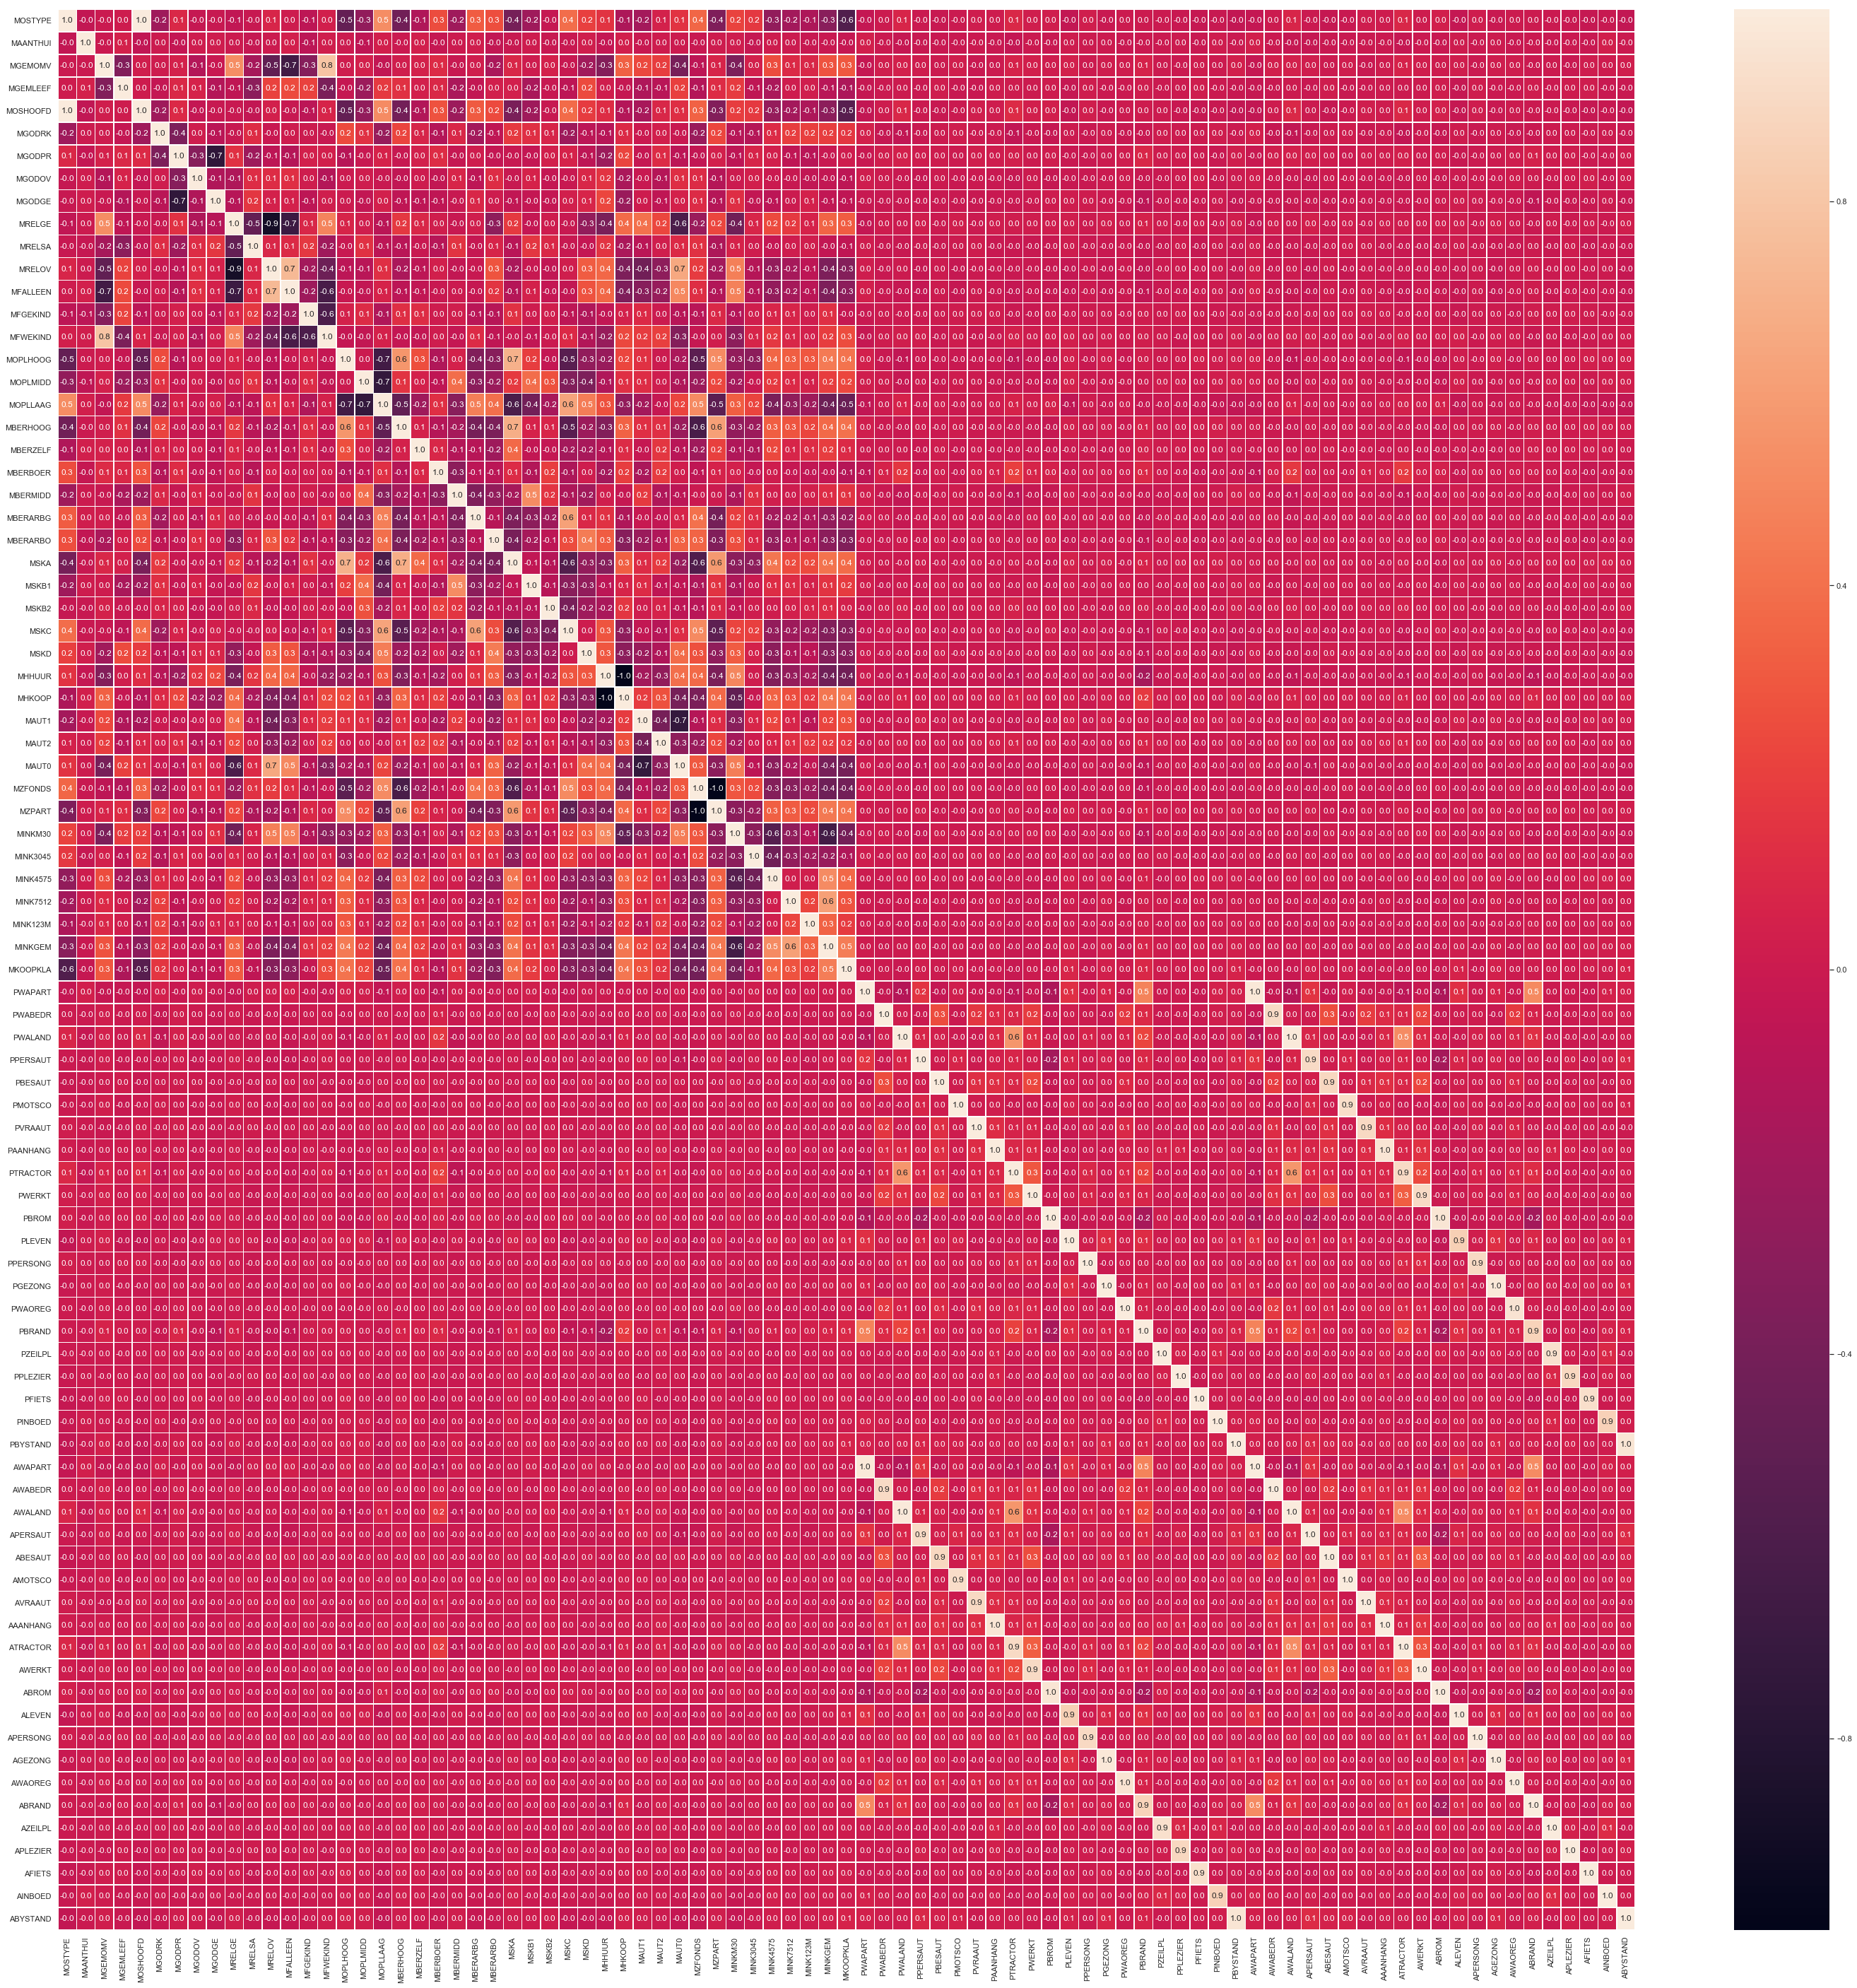

In [104]:
# dataset.iloc[:,1:-1].corr()
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
#correlation map
f,ax = plt.subplots(figsize=(50, 50))
sns.heatmap(dataset.iloc[:,1:-1].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

# Dropping Variables having high Correlation with another variable

In [105]:
data = dataset.drop(["ORIGIN","MOSHOOFD","MGODGE","MRELOV","MFALLEEN","MFWEKIND","MOPLHOOG","MOPLMIDD","MBERHOOG","MHKOOP","MAUT1","MZFONDS","PWAPART","PWABEDR","PWALAND","PPERSAUT","PBESAUT","PMOTSCO","PVRAAUT","PAANHANG","PTRACTOR","PWERKT","PBROM","PLEVEN","PPERSONG","PGEZONG","PWAOREG","PBRAND","PZEILPL","PPLEZIER","PFIETS","PINBOED","PBYSTAND"], axis=1)
data.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MGODRK,MGODPR,MGODOV,MRELGE,MRELSA,MFGEKIND,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
0,33,1,3,2,0,5,1,7,0,2,...,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,1,4,1,6,2,4,...,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,0,4,2,3,2,4,...,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,2,3,2,5,2,3,...,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,1,4,1,7,1,4,...,0,0,0,1,0,0,0,0,0,0


# Histogram of variables

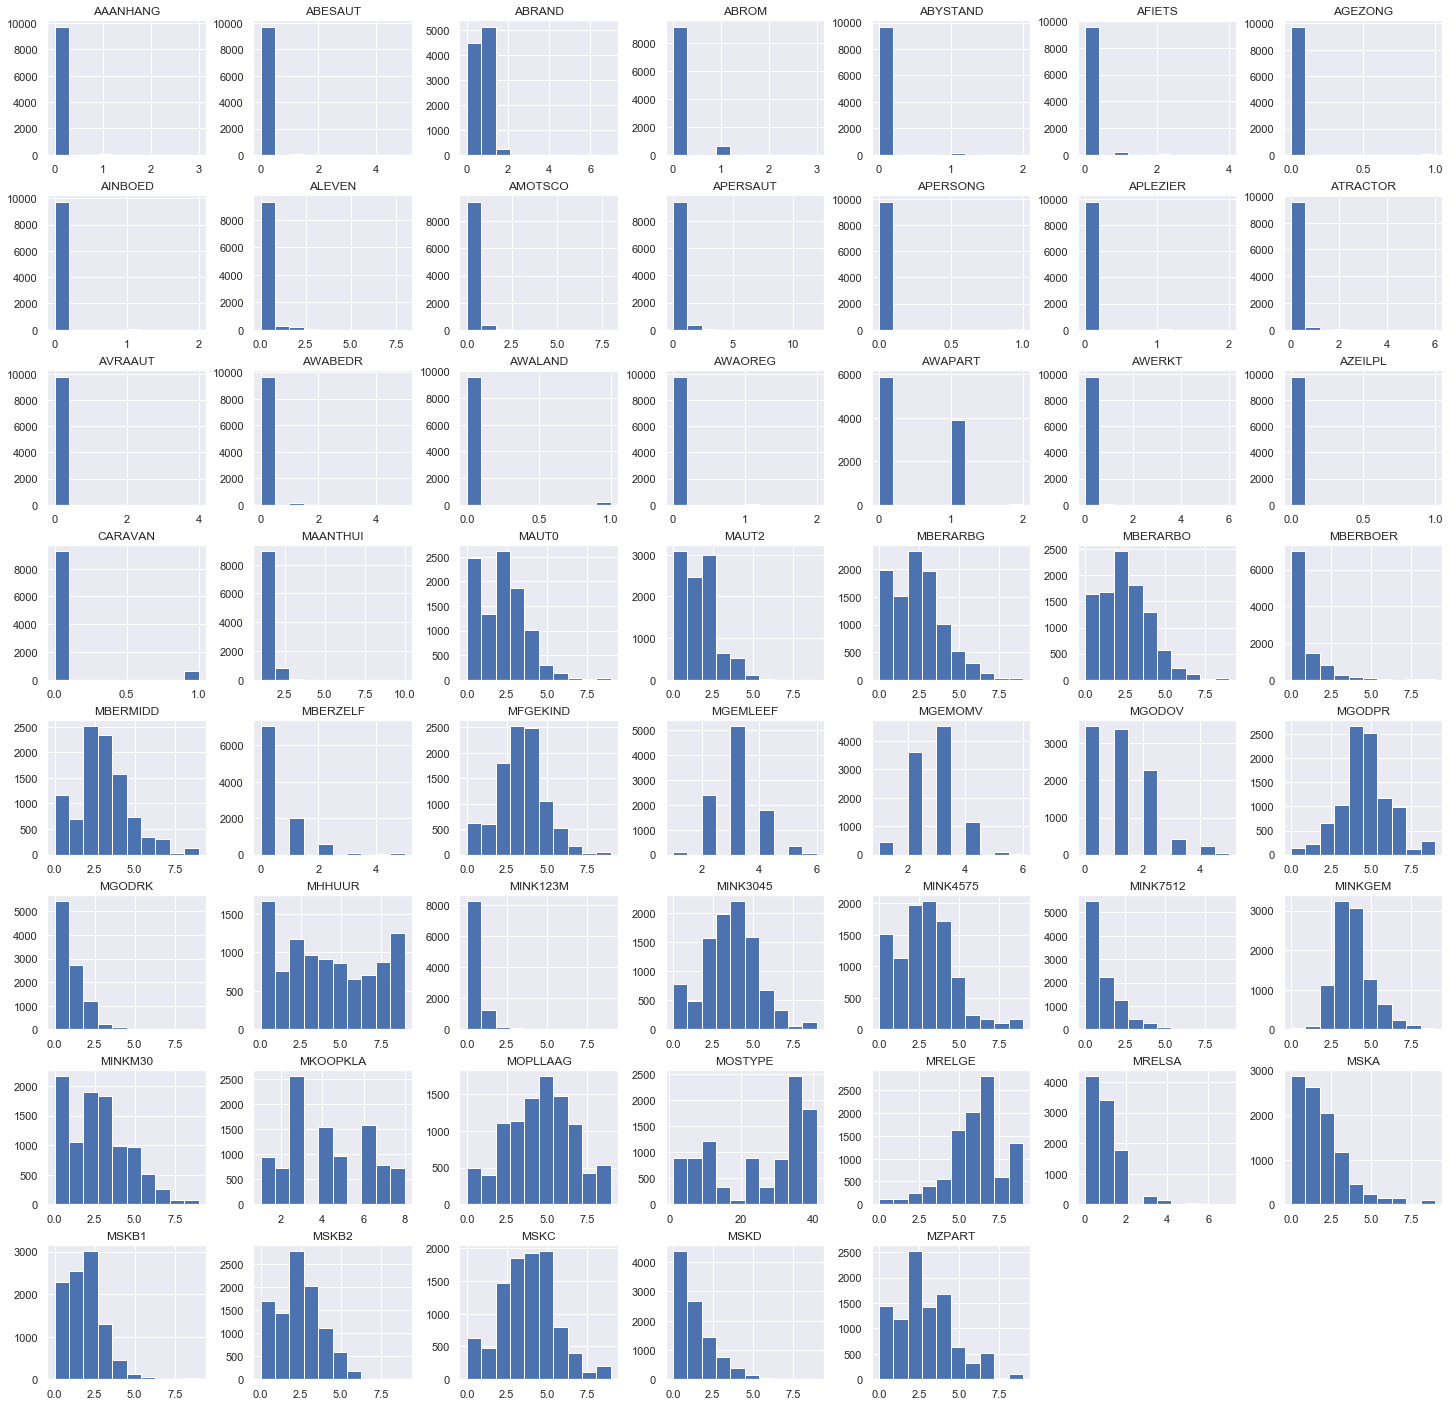

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
data.hist()
plt.gcf().set_size_inches(25, 25)
sns.set(color_codes=True)
plt.savefig("histogram-distribution.png")

In [107]:
df = pd.get_dummies(data=data, columns=['MOSTYPE'])
df.head()

,MAANTHUI,MGEMOMV,MGEMLEEF,MGODRK,MGODPR,MGODOV,MRELGE,MRELSA,MFGEKIND,MOPLLAAG,...,MOSTYPE_32,MOSTYPE_33,MOSTYPE_34,MOSTYPE_35,MOSTYPE_36,MOSTYPE_37,MOSTYPE_38,MOSTYPE_39,MOSTYPE_40,MOSTYPE_41
0,1,3,2,0,5,1,7,0,2,7,...,0,1,0,0,0,0,0,0,0,0
1,1,2,2,1,4,1,6,2,4,4,...,0,0,0,0,0,1,0,0,0,0
2,1,2,2,0,4,2,3,2,4,4,...,0,0,0,0,0,1,0,0,0,0
3,1,3,3,2,3,2,5,2,3,2,...,0,0,0,0,0,0,0,0,0,0
4,1,4,2,1,4,1,7,1,4,0,...,0,0,0,0,0,0,0,0,1,0


# Calculating User Similarity Matrix

In [108]:
from sklearn.metrics.pairwise import pairwise_distances
user_similarity = pairwise_distances(df, metric='cosine')
user_similarity.shape

(9822, 9822)

In [109]:
max(user_similarity[0])

0.7526775689919633

# Storing Policies List from Dataframe

In [110]:
policiescolumnlist=df.columns[31:53]
print(policiescolumnlist)

Index(['AWAPART', 'AWABEDR', 'AWALAND', 'APERSAUT', 'ABESAUT', 'AMOTSCO',
       'AVRAAUT', 'AAANHANG', 'ATRACTOR', 'AWERKT', 'ABROM', 'ALEVEN',
       'APERSONG', 'AGEZONG', 'AWAOREG', 'ABRAND', 'AZEILPL', 'APLEZIER',
       'AFIETS', 'AINBOED', 'ABYSTAND', 'CARAVAN'],
      dtype='object')


In [124]:
user_index=9

# Extracting the list of policies which current user doesn't have

In [112]:
availablecollist=[]
for item in policiescolumnlist:
    if df.loc[user_index,item]==0:
        availablecollist.append(item)

# Model for User-Collaborative Filtering

In [139]:
no_of_policies=4 #you can set this variable value as number of policies you want to recommend.
output=dict()
i=1
# print(output)
while i < 50:
#     print("OK")
    opdf=df.iloc[user_similarity[user_index].argsort()[(i-1)*10:i*10], 31:53] #list of indexes of row
#     print(opdf[availablecollist].sum().sort_values()[opdf[availablecollist].sum().sort_values()>0])
    tempoutput=dict(opdf[availablecollist].sum().sort_values()[opdf[availablecollist].sum().sort_values()>0])
    output.update(tempoutput)
#     print(len(output))
#     print(output)
    if len(output)>=no_of_policies:
        break
    i+=1
    if i>50:
        print("There are no products, as per top 50 similar people")
        break

In [140]:
output

{'CARAVAN': 1, 'AAANHANG': 1, 'ABESAUT': 3, 'AWAPART': 5}

In [141]:
print(sorted(output))

['AAANHANG', 'ABESAUT', 'AWAPART', 'CARAVAN']
